import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris


Load and Preprocess the Data

For demonstration purposes, we will use the Iris dataset, which is commonly used for classification and dimensionality reduction tasks. It has four features (dimensions) and three classes.

In [4]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Principal Component Analysis (PCA)

PCA is one of the most widely used dimensionality reduction techniques. It transforms the data into a new coordinate system where the axes (principal components) are ordered by the variance they explain in the data. The first principal component explains the most variance, followed by the second, and so on.

Key Concepts in PCA:

Explained Variance: The ratio of the variance explained by each principal component.

Principal Components: The new axes of the transformed data that represent directions of maximum variance.

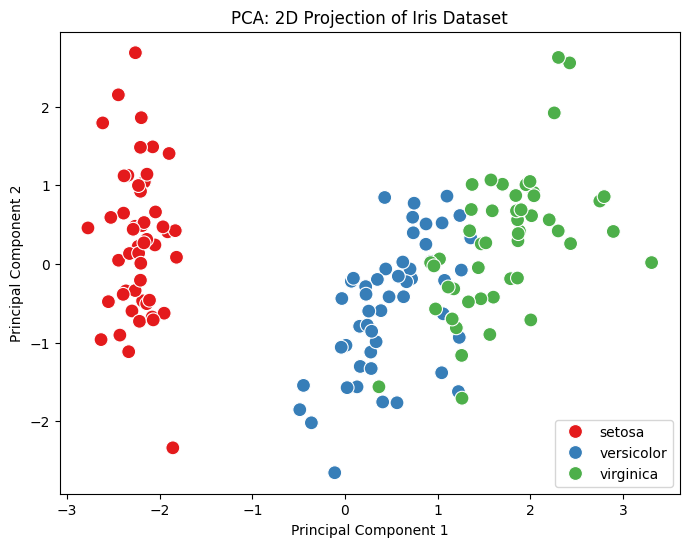

In [10]:
# Apply PCA to reduce the dimensions from 4 to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the 2D projection of the data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=iris.target_names[y], palette="Set1", s=100)
plt.title("PCA: 2D Projection of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


explained variance:

In [11]:
# Explained variance ratio
print("Explained variance ratio by each component:", pca.explained_variance_ratio_)


Explained variance ratio by each component: [0.72962445 0.22850762]


t-Distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE is another dimensionality reduction technique primarily used for visualizing high-dimensional data. It tries to map high-dimensional data to two or three dimensions by minimizing the divergence between probability distributions that represent pairwise similarities.

Key Concepts in t-SNE:

Perplexity: Controls the balance between local and global aspects of the data.

Learning Rate: Affects the optimization process and convergence.

You can also adjust the perplexity and learning_rate parameters to see how the visualization changes.

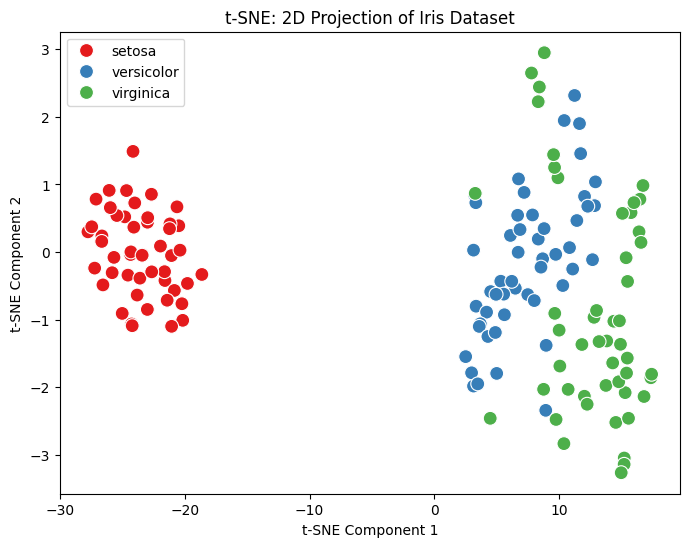

In [7]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize the 2D projection of the data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=iris.target_names[y], palette="Set1", s=100)
plt.title("t-SNE: 2D Projection of Iris Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.show()


Truncated Singular Value Decomposition (Truncated SVD)

Truncated SVD is similar to PCA but can be applied to sparse matrices. It decomposes the data into a set of orthogonal components and retains the top singular values. It is used in applications such as Latent Semantic Analysis (LSA) and recommendation systems.


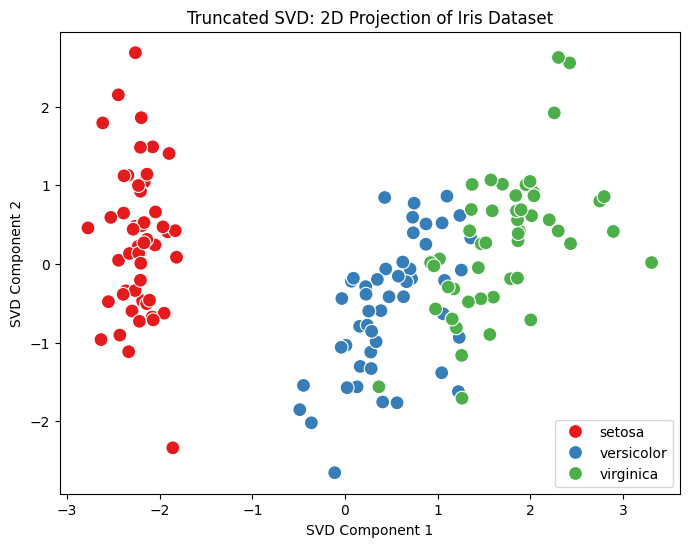

In [8]:
# Apply Truncated SVD (equivalent to PCA but can work with sparse matrices)
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_scaled)

# Visualize the 2D projection of the data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], hue=iris.target_names[y], palette="Set1", s=100)
plt.title("Truncated SVD: 2D Projection of Iris Dataset")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.legend()
plt.show()


Comparing the Results

Now that we've used PCA, t-SNE, and Truncated SVD for dimensionality reduction, let's compare their results visually.

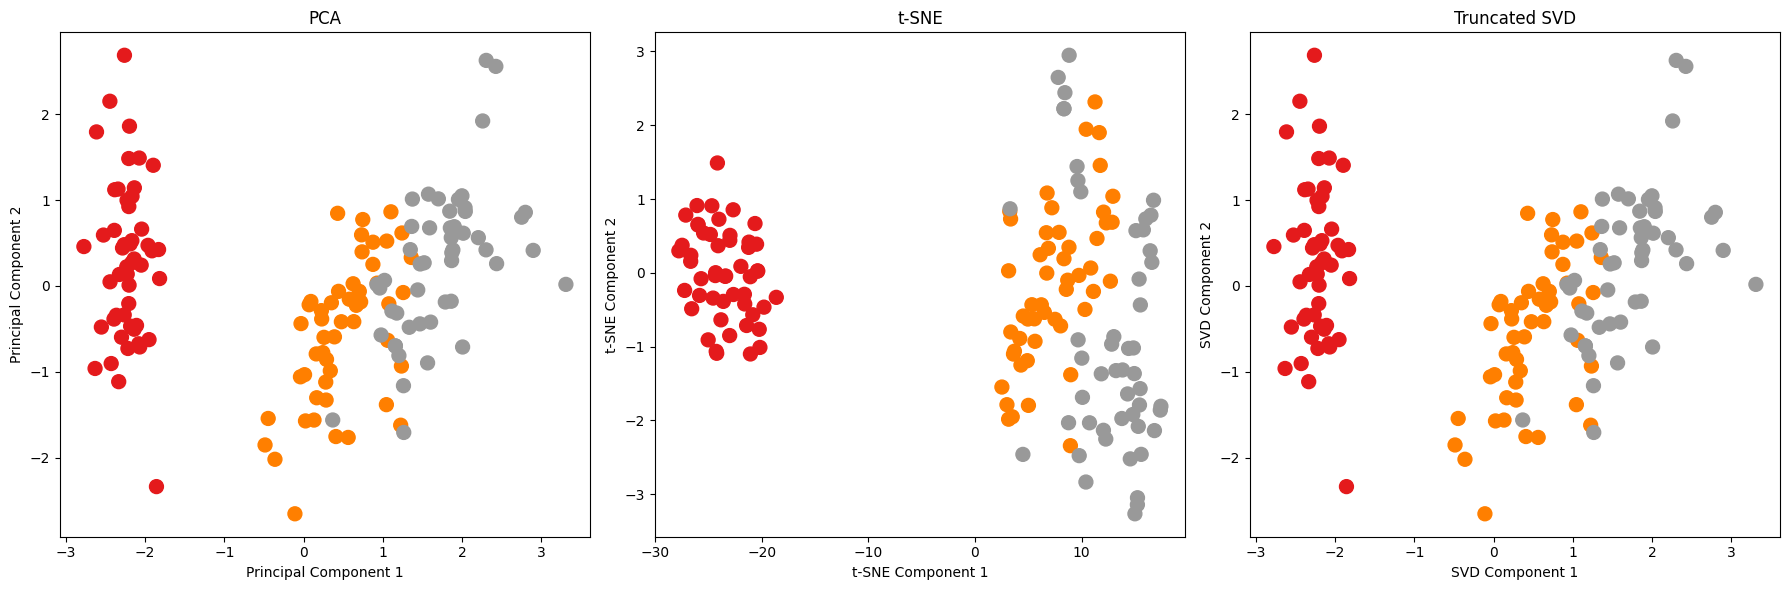

In [9]:
# Create a subplot with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# PCA Plot
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Set1', s=100)
axes[0].set_title("PCA")
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")

# t-SNE Plot
axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='Set1', s=100)
axes[1].set_title("t-SNE")
axes[1].set_xlabel("t-SNE Component 1")
axes[1].set_ylabel("t-SNE Component 2")

# Truncated SVD Plot
axes[2].scatter(X_svd[:, 0], X_svd[:, 1], c=y, cmap='Set1', s=100)
axes[2].set_title("Truncated SVD")
axes[2].set_xlabel("SVD Component 1")
axes[2].set_ylabel("SVD Component 2")

plt.tight_layout()
plt.show()


Notes

PCA is suitable for linear dimensionality reduction and is often used for feature selection or preprocessing for machine learning algorithms. It works best when the data is normally distributed and can be linearly transformed into a lower-dimensional space.

t-SNE is great for visualizing high-dimensional data but is computationally expensive for large datasets. It is particularly useful for visualizing clusters or relationships that are difficult to detect in higher dimensions.

Truncated SVD is often used for sparse matrices, such as in natural language processing and recommendation systems. It is a generalization of PCA and does not require the data to be centered.